# Churn Prediction of Customers


DATASET

The Dataset is a fictional dataset of customer churn from telecom industry. Dataset is obtained from: https://www.kaggle.com/blastchar/telco-customer-churn

ATTRIBUTES
The following are the features present in the dataset

Target Feature:

Churn: Whether the customer churned or not (Yes or No)

Seventeen categorical Features:

Features related to Customer Personal details:

CustomerID: Customer ID , a unique ID for each customer

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not
Partner: Whether the customer has a partner or not
Dependents: Whether the customer has dependents or not
Features based on the services opted by the Customer:

Contract: The contract term of the customer (Month-to-month, One year, Two years)
PaperlessBilling: Whether the customer has paperless billing or not
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
PhoneService: Whether the customer has a phone service or not
If the customer has opted "PhoneSevice" the following are features are to be considered
MultipleLines: Whether the customer has multiple phone lines or not
InternetService: Type of Internet Connection opted by Customer. (DSL, Fiber optic, No)
If the customer has opted "InternetService" the following are features are to be considered

OnlineSecurity: Whether the customer has online security or not
OnlineBackup: Whether the customer has an online backup or not
DeviceProtection: Whether the customer has device protection or not
TechSupport: Whether the customer has tech support or not
StreamingTV: Whether the customer has streaming TV or not
StreamingMovies: Whether the customer has streaming movies or not
Three numerical Features:

MonthlyCharges: The amount charged to the customer monthly
TotalCharges: The total amount charged to the customer
Tenure: Number of months the customer has used the services of the company / stayed with the company

In [95]:
# Basic Python Packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# Packages for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Packages for Feature selection
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# packages for model evaluation
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score, fbeta_score, make_scorer

#Packages for Models

from sklearn.svm import SVC


In [3]:
df = pd.read_csv(r"C:\Users\raaga\Downloads\CHURN DATASET\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
df.shape

(7043, 21)

In [98]:
X = df.drop(['Churn'], axis = 1)
Y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify = Y, test_size = 0.25, random_state= 42)


In [99]:
x_train.shape

(5282, 20)

In [100]:
train = pd.concat([x_train,  y_train], axis = 1)
train.shape

(5282, 21)

In [101]:
train = pd.concat([x_train,  y_train], axis = 1)
train.shape

(5282, 21)

All the analysis should be done only on the training set and not on test set. If analysis and preprocessing is done on test set, then the test set may not reflect the correct result as it becomes biased due to data leakage.

# Exploratory Data Analysis

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 6661 to 5639
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   objec

There are no missing values in the dataset



In [103]:
train_duplicates = train[train.duplicated()]
train_duplicates.shape

(0, 21)

 There is no duplicate rows in this dataset

In [104]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5282.000000,5282.000000,5282.000000
mean,0.162060,32.362931,64.856626
std,0.368541,24.627623,30.171934
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.450000
50%,0.000000,29.000000,70.500000
75%,0.000000,55.750000,89.987500
max,1.000000,72.000000,118.750000


In [105]:
train.Churn.value_counts()

No     3880
Yes    1402
Name: Churn, dtype: int64

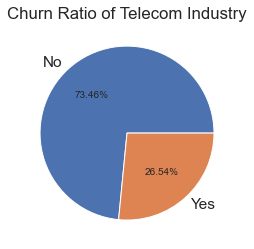

In [106]:
plt.figure(figsize=(6, 4))
plt.pie(train.Churn.value_counts()/train.shape[0], labels = train.Churn.unique(), autopct='%1.2f%%')
plt.title("Churn Ratio of Telecom Industry")
plt.show()

 26.54% of customers are churning, 73.46% of customers retain with our business.

# Viewing the Unique Values of Each Column

In [107]:
for feature in train.columns:
  len_unique = len(train[feature].unique())
  if len_unique <= 10 :
    uniq = train[feature].unique()
  else:
    uniq = "too large to print all values.. some sample are" + str(train[feature][500:505].values)
  print("Feature",feature,"has",len_unique,"values -",uniq)

Feature customerID has 5282 values - too large to print all values.. some sample are['3317-HRTNN' '0238-WHBIQ' '0578-SKVMF' '3696-DFHHB' '0363-SVHYR']
Feature gender has 2 values - ['Female' 'Male']
Feature SeniorCitizen has 2 values - [0 1]
Feature Partner has 2 values - ['Yes' 'No']
Feature Dependents has 2 values - ['Yes' 'No']
Feature tenure has 73 values - too large to print all values.. some sample are[ 5 72 22 68 71]
Feature PhoneService has 2 values - ['No' 'Yes']
Feature MultipleLines has 3 values - ['No phone service' 'No' 'Yes']
Feature InternetService has 3 values - ['DSL' 'No' 'Fiber optic']
Feature OnlineSecurity has 3 values - ['No' 'No internet service' 'Yes']
Feature OnlineBackup has 3 values - ['Yes' 'No' 'No internet service']
Feature DeviceProtection has 3 values - ['No' 'No internet service' 'Yes']
Feature TechSupport has 3 values - ['Yes' 'No' 'No internet service']
Feature StreamingTV has 3 values - ['Yes' 'No' 'No internet service']
Feature StreamingMovies has 3

In [ ]:
The TotalCharges are float numbers but it's datatype is an Object. We need to check it.

In [ ]:
If we are not converting the Object type of TotalCharges to Float type, then we may not be able to do the EDA.

In [108]:
# TotalCharges is an integer, not an object, so it has to be converted
TotalCharges_missing = train[ pd.to_numeric(train['TotalCharges'], errors='coerce').isnull()]
TotalCharges_missing

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No


 In the above table we can see for TotalCharges there are no values.

# From the all the 'TotalCharges' with missing value, we can see that it has a Tenure of 0

In [109]:
"""
this feature is created to see if the totalcharges is based on or related to 
the total number of services opted by the customer (ie) To see if Customer has 
not opted for any service then the TotalCharges is left empty/missing .
"""

train['total_services_opted'] = (train[[ 
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']] == "Yes").sum(axis = 1)

In [110]:
train.loc[:,['Contract','tenure', 'MonthlyCharges', 'TotalCharges','total_services_opted']].sort_values(by=['tenure']).head(30)

,Contract,tenure,MonthlyCharges,TotalCharges,total_services_opted
488,Two year,0,52.55,,4
3826,Two year,0,25.35,,2
6754,Two year,0,61.90,,5
1082,Two year,0,25.75,,2
3331,Two year,0,19.85,,1
6670,Two year,0,73.35,,6
4380,Two year,0,20.00,,1
1340,Two year,0,56.05,,5
3310,Month-to-month,1,78.45,78.45,2
3917,Month-to-month,1,69.10,69.1,1


In [ ]:
From the above we can understand that approx (TotalCharges) = tenure * MonthlyCharges

So we can replace the missing values with same formula

In [111]:
print("Count of Missing Values in TotalCharges is",TotalCharges_missing.shape[0])

Count of Missing Values in TotalCharges is 8


In [ ]:
Count of Missing Values in TotalCharges is 8

In [112]:
print("'",train.loc[488]['TotalCharges'],"'")
# this shows that around 11 rows contain empty spaces, it is NULL value

'   '


In [113]:
# the following are the index numbers of the rows with missing values
TotalCharges_missing.index

Int64Index([6670, 3826, 4380, 488, 1082, 1340, 6754, 3331], dtype='int64')

In [114]:
for idx in TotalCharges_missing.index:
  train.loc[idx,'TotalCharges'] = train.loc[idx]['tenure'] * train.loc[idx]['MonthlyCharges']

In [25]:
print("Index: ", TotalCharges_missing.index[1],"- It's TotalCharges is",train.loc[TotalCharges_missing.index[1],'TotalCharges'])

Index:  3826 - It's TotalCharges is 0.0


In [115]:
# Convert the Object DataType of "TotalCharges" to Float
train['TotalCharges'] = train['TotalCharges'].astype(str).astype(float)
train['TotalCharges'].dtype

dtype('float64')

# Now we do not have the need of the feature "total_services_opted" created by us, as it did not provide any information with respect to TotalCharges. So let us drop it.

In [116]:
train.drop('total_services_opted', axis = 1, inplace = True)

In [117]:
# creating separate lists for categorical and numerical features  
categorical_features = []
numerical_features = []
for feature in train.columns:
  if train[feature].dtype == 'O':
    categorical_features.append(feature)
  else:
    numerical_features.append(feature)
numerical_features.remove("SeniorCitizen")
categorical_features.insert(4, "SeniorCitizen") # inseart 'SeniorCitizen' in 4th place
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'SeniorCitizen',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [118]:
def count_percentage_subplots(features_list, rows, cols, huee, dataa, x_ticks_rotation = 0, figsize_row = 14, figsize_col = 9 , prcnt_color = 'white', prcnt_height = -100 ):
  fig = plt.figure(figsize = (figsize_row, figsize_col))
  ax_list = []
  for i in range(1,cols * rows+1):
    ax_list.append("ax"+str(i))
  for index,ax_name in enumerate(ax_list): # for features 
    ax_name = plt.subplot(rows, cols, index+1)
    feature = features_list[index]
    sns.countplot(x=feature , hue = huee, data= dataa, order = sorted(list(dataa[feature].unique())))
    plt.xticks(rotation= x_ticks_rotation)
    for index,p in enumerate(ax_name.patches):
      height = p.get_height()
      temp = list(round(dataa.groupby(huee)[feature].value_counts(sort = False)/len(dataa)*100,2))
      ax_name.text(p.get_x()+p.get_width()/2., height+prcnt_height, str(temp[index]) + "%", horizontalalignment='center', fontsize=11, color=prcnt_color, weight = 'heavy') 
      
  fig. tight_layout(pad=4.0)
  plt.show()

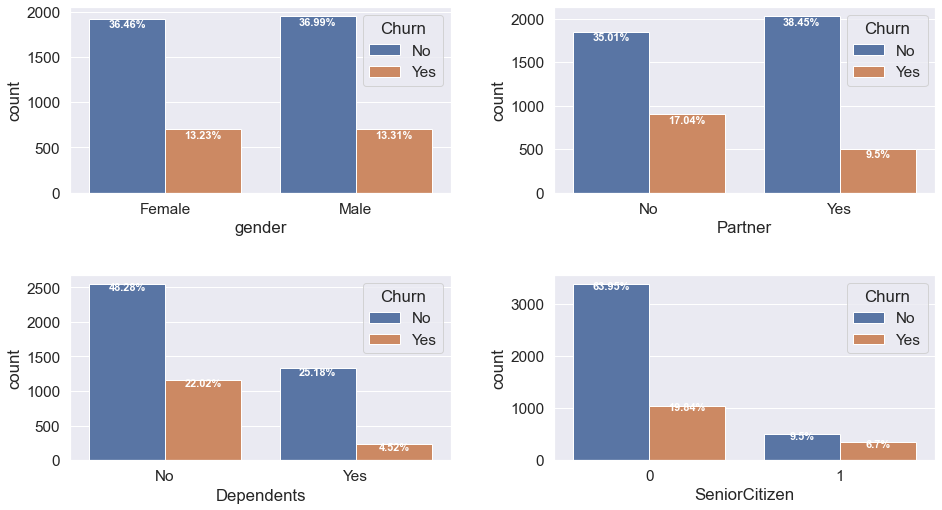

In [119]:
count_percentage_subplots(['gender', 'Partner', 'Dependents', 'SeniorCitizen'],2,2, "Churn", train, figsize_row = 14, figsize_col = 8 )

In [ ]:
Observation:

1) The ratio of male and female customer are same
2) Customers without Partner or dependent churn more than those who dont

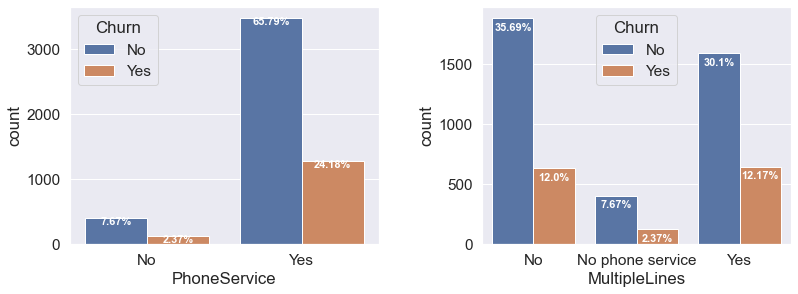

In [120]:
count_percentage_subplots(['PhoneService','MultipleLines'],1,2, "Churn", train, figsize_row = 12, figsize_col = 5 )

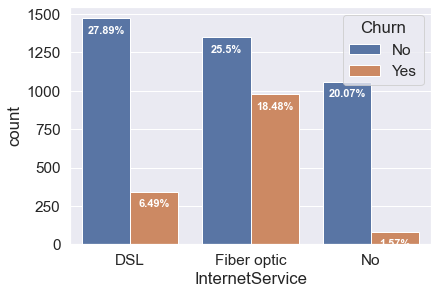

In [121]:
count_percentage_subplots(['InternetService'],1,1, "Churn", train, figsize_row = 7, figsize_col = 5 )

In [ ]:
Observation:

1) Customer with "Fiber optic" have high churn rate

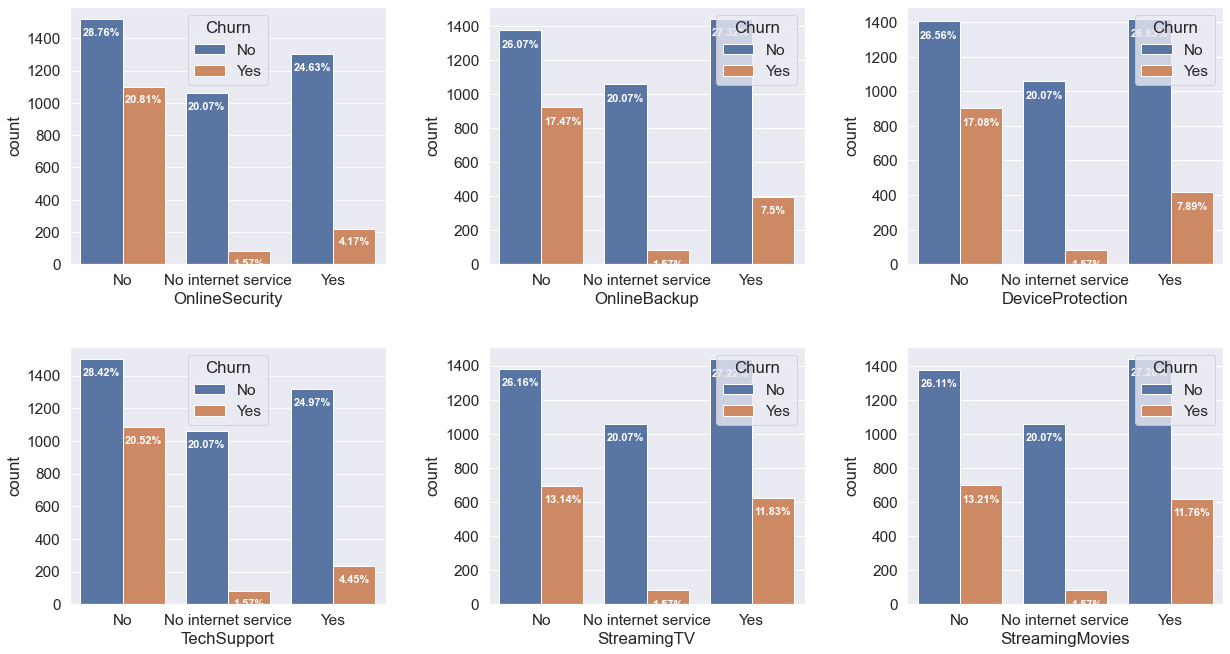

In [122]:
count_percentage_subplots(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
                         2,3, "Churn", train, figsize_row = 18, figsize_col = 10 )

In [ ]:
Observation:

A Customer who has internet service but does not have any of the following are more likely to churn.
"OnlineBackup"
"DeviceProtection"
"Online Security"
"TechSupport"

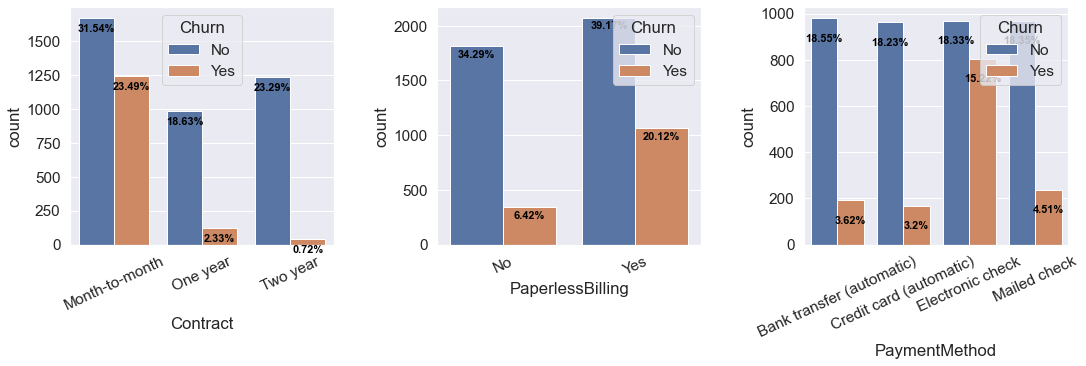

In [123]:
  count_percentage_subplots(['Contract','PaperlessBilling','PaymentMethod'],1,3, "Churn", train, figsize_row =16 , figsize_col = 6 ,x_ticks_rotation = 25,prcnt_color = 'black')


# Observation:

1)Customers with month-to-month contract have a high churn rate with 23.54%

2)Check and cheque are examples of differences in spelling between British and American English. So Payment Method "Electronic check" and "Mailed check" are manual method of payements and "Credit card" and "Bank transfer" are automatic payments which does not involve the customer for each payments.

3)Customer paying with electronic check also have a high churn rate around 15.35%....this explain that why the churn of customers with paper billing is high.

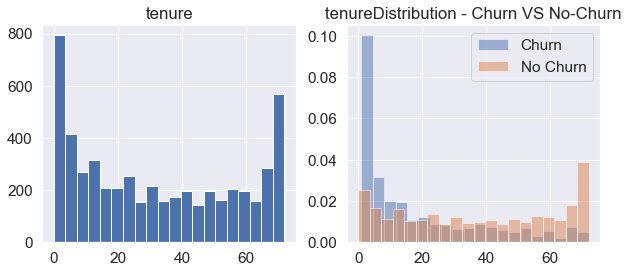

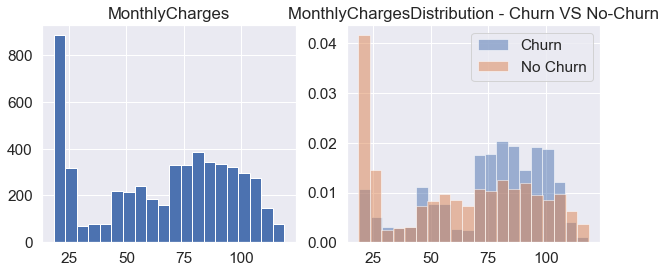

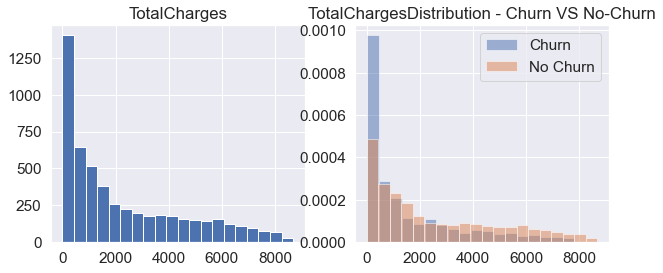

In [124]:
for feature in numerical_features[0:3]:

  fig = plt.figure(figsize = (10,4))
  
  ax1 = plt.subplot(1,2,1)
  ax1.set_title(feature)
  plt.hist(train[feature], bins =20)
  
  ax2 = plt.subplot(1,2,2)
  plt.hist(train[train['Churn'] == 'Yes'][feature], bins = 20,alpha = 0.5, label = 'Churn', density = True)
  plt.hist(train[train['Churn'] == 'No'][feature], bins = 20,alpha = 0.5, label = 'No Churn', density = True)
  # ax2.hist(train[feature], hue = train['Churn'],bins =20)
  ax2.set_title(feature+"Distribution - Churn VS No-Churn")
  ax2.legend(loc = 'upper right')
  plt.show()
  print("\n")


In [ ]:
Observation:

1)We can see that the Churn customers have a shorter tenure, which means that the newly joined customers are not satisfied with our services or facing some issues.
2)The Churn Customer have a high monthly charges than those who don't.

# Outlier Detection

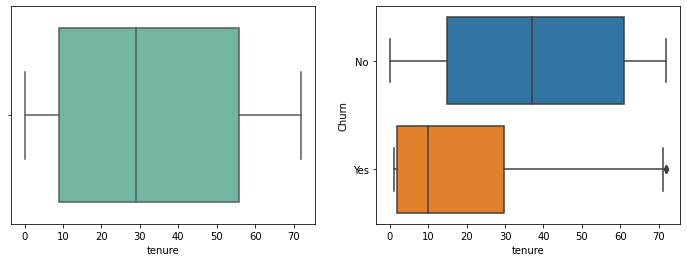

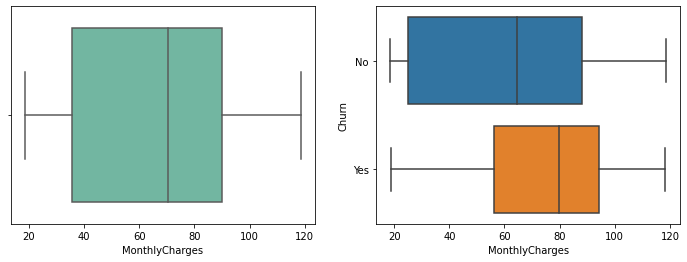

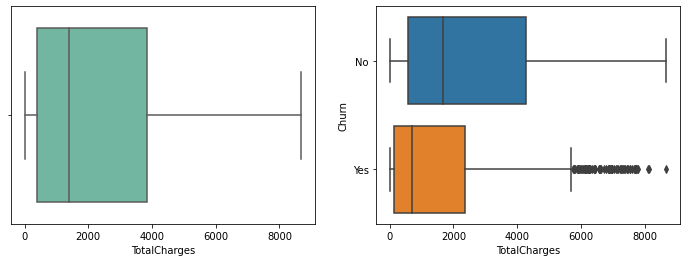

In [36]:
for feature in numerical_features:
  fig, axes = plt.subplots(1,2,figsize=(12,4))
  sns.boxplot(x = feature , data = train, ax=axes[0], palette="Set2")
  sns.boxplot(x = feature , data = train, y = 'Churn',ax=axes[1])
  plt.show()
  print("\n")

In [ ]:
Observation:

1) From the left images we can observe that all three numerical features do not have any outliers.

2) From the right images we can see that

Churn Customers have very short tenure
Churn Customer Median Monthy charges is greater than Non Churn Customer
The Churn Customer have less Total Charges

# Feature Engineering
Using EDA we have understood how the train data is. So let us start the preprocessing steps.

# Renaming Some Feature

In [125]:
x_train.rename(columns={'gender':'Gender'
                       ,'Contract':'ContractType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)

In [126]:
x_test.rename(columns={'gender':'Gender'
                       ,'Contract':'ContractType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)

In [127]:
# renaming these features in train dataframe will be helpful for some of the preprocessing steps
train.rename(columns={'gender':'Gender'
                       ,'Contract':'ContractType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)

# Feature Selection Using Statistical Test
T-TEST FOR FEATURE SELECTION OF CATEGORICAL (TARGET) VS CONTINUOUS FEATURE

Here T-Test is taken because the feature churn has only two groups "Churn" and "Not Churn"

In [128]:
def TTest(data, target, Continuous_features):

    RemoveFeatures=[]
    
    print('The T-Test result are : ')
    for feature in Continuous_features:
        feature_data = data.groupby(target)[feature].apply(list)
        pvalue = ttest_ind(*feature_data)[1]
        # If the T-Test P-Value is <0.05, that means we reject H0
        if (pvalue < 0.05):
            print(feature, 'is correlated with', target , '| P-Value:', pvalue)
        else:
            print(feature, 'is NOT correlated with', target , '| P-Value:', pvalue)
            RemoveFeatures.append(feature)
    print("\n\n")
    return(RemoveFeatures)

In [129]:
# Calling the function to check which categorical variables are correlated with target
Continuous_features =['Tenure', 'MonthlyCharges', 'TotalCharges']
remove_features_con = TTest(data=train, target='Churn', Continuous_features = Continuous_features)
print("Features to be removed are :",remove_features_con)

The T-Test result are : 
Tenure is correlated with Churn | P-Value: 6.745011646431831e-146
MonthlyCharges is correlated with Churn | P-Value: 1.5695206211219092e-47
TotalCharges is correlated with Churn | P-Value: 5.629487289697648e-45



Features to be removed are : []


# CHI SQUARE TEST FOR FEATURE SELECTION OF CATEGORICAL (TARGET) VS CATEGORICAL FEATURE

In [130]:
# creating new list of categorical features after changing spelling of features
categorical_features= list(x_train.columns)
for con in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
  categorical_features.remove(con)

In [131]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def ChiSquare( data, target, categorical_features):
    
    # Creating an empty list of final selected predictors
    RemoveFeatures=[]

    print('The ChiSquare result are : \n')
    for feature in categorical_features:
        CrossTabResult=pd.crosstab(index = data[target], columns=data[feature])
        pvalue = chi2_contingency(CrossTabResult)[1]
        # print(Result)
        # If the ChiSquare P-Value is <0.05, that means we reject H0
        if (pvalue < 0.05):
            print(feature, 'is correlated with', target, '| P-Value:', pvalue)
        else:
            print(feature, 'is \033[1m NOT \033[0m correlated with', target, '| P-Value:', pvalue)   
            RemoveFeatures.append(feature)     
    print("\n\n")
    return(RemoveFeatures)

In [132]:
remove_features_cat = ChiSquare(data = train, target = 'Churn', categorical_features = categorical_features)
print("Features to be removed are :",remove_features_cat)

The ChiSquare result are : 

customerID is  NOT  correlated with Churn | P-Value: 0.4935308220743649
Gender is  NOT  correlated with Churn | P-Value: 0.9133053640134722
SeniorCitizen is correlated with Churn | P-Value: 1.272738902968206e-26
Partner is correlated with Churn | P-Value: 3.2051580573988954e-26
Dependents is correlated with Churn | P-Value: 1.5736459837130873e-33
PhoneService is  NOT  correlated with Churn | P-Value: 0.11545819531090502
MultipleLines is correlated with Churn | P-Value: 0.004920729444037898
InternetService is correlated with Churn | P-Value: 7.816331813947432e-122
OnlineSecurity is correlated with Churn | P-Value: 3.1008969206083305e-142
OnlineBackup is correlated with Churn | P-Value: 1.7543681370437227e-100
DeviceProtection is correlated with Churn | P-Value: 1.0712098242548213e-91
TechSupport is correlated with Churn | P-Value: 7.966555837638945e-139
StreamingTV is correlated with Churn | P-Value: 2.9763744289949415e-62
StreamingMovies is correlated with 

# Dropping Variables

In [133]:
x_train.drop(remove_features_cat, axis = 1, inplace = True)
x_train.head(3)

,SeniorCitizen,Partner,Dependents,Tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6661,0,Yes,Yes,72,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784
4811,0,No,No,4,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.6
2193,0,No,Yes,56,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65


In [134]:
x_test.drop(remove_features_cat, axis = 1, inplace = True )

# Encoding of Categorical Features

In [135]:
# manual label encoding if y_train features
y_train = y_train.map({'Yes':1,'No':0})
y_train.head(3)

6661    0
4811    1
2193    0
Name: Churn, dtype: int64

In [136]:
y_test = y_test.map({'Yes':1,'No':0})

In [137]:
# manual label encoding if x_train features
for feature in ['Partner', 'Dependents', 'PaperlessBilling']:
  x_train[feature] = x_train[feature].map({'Yes':1,'No':0})
  x_test[feature] = x_test[feature].map({'Yes':1,'No':0})

x_train['MultipleLines'] = x_train.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})
x_train['ContractType'] = x_train.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})

x_test['MultipleLines'] = x_test.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})
x_test['ContractType'] = x_test.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})

for feature in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
  x_train[feature] = x_train[feature].map({'Yes':1,'No':0,'No internet service':0})
  x_test[feature] = x_test[feature].map({'Yes':1,'No':0,'No internet service':0})

In [138]:
x_train = pd.get_dummies(x_train, columns= ['InternetService','PaymentMethod'], drop_first = True)
x_test = pd.get_dummies(x_test, columns= ['InternetService','PaymentMethod'], drop_first = True)

# Scaling of Numerical Features

In [139]:
# TotalCharges is an integer, not an object, so it has to be converted in x_train and x_test
TotalCharges_missing_x_train = x_train[ pd.to_numeric(x_train['TotalCharges'], errors='coerce').isnull()]
for idx in TotalCharges_missing_x_train.index:
  x_train.loc[idx,'TotalCharges'] = x_train.loc[idx]['Tenure'] * x_train.loc[idx]['MonthlyCharges']
x_train['TotalCharges'] = x_train['TotalCharges'].astype(str).astype(float)
x_train['TotalCharges'].dtype

dtype('float64')

In [140]:
TotalCharges_missing_x_test = x_test[ pd.to_numeric(x_test['TotalCharges'], errors='coerce').isnull()]
for idx in TotalCharges_missing_x_test.index:
  x_test.loc[idx,'TotalCharges'] = x_test.loc[idx]['Tenure'] * x_test.loc[idx]['MonthlyCharges']
x_test['TotalCharges'] = x_test['TotalCharges'].astype(str).astype(float)
x_test['TotalCharges'].dtype

dtype('float64')

In [141]:
scaler = MinMaxScaler()
minmax_scaler = scaler.fit(x_train[['Tenure','MonthlyCharges','TotalCharges']])
x_train[['Tenure','MonthlyCharges','TotalCharges']] = minmax_scaler.transform(x_train[['Tenure','MonthlyCharges','TotalCharges']])
x_train.head(3)

,SeniorCitizen,Partner,Dependents,Tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6661,0,1,1,1.000000,0,0,1,0,1,1,1,1,0,0.351271,0.435704,0,0,1,0,0
4811,0,0,0,0.055556,0,0,0,0,0,0,0,0,1,0.275037,0.022292,0,0,0,0,1
2193,0,0,1,0.777778,0,0,0,0,0,0,0,1,1,0.027902,0.142623,0,1,0,0,1


In [142]:
x_test[['Tenure','MonthlyCharges','TotalCharges']] = minmax_scaler.transform(x_test[['Tenure','MonthlyCharges','TotalCharges']])


# Model Selection
The model that will be used are :
   1) LinearSVC
   2) Gaussian RBF SVC
   3) Polynomial SVC
   4) Sigmoid SVC

In [143]:
def plot_confusion_matrix(y_test, pred):
  cm = confusion_matrix(y_test, pred)
  
  df_cm = pd.DataFrame(cm, [0,1], [0,1])
  plt.figure(figsize=(5,3))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_cm, annot=True, fmt='g', cbar=False, cmap="YlGnBu") # font size , annot_kws={"size": 16}
  plt.title('Confusion Matrix\n', y=1.1)
  plt.ylabel('Actual label\n')
  plt.xlabel('Predicted label\n')

  plt.show()


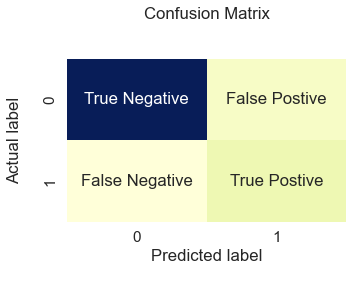

In [144]:
# the above function will return confusion matrix with values in the following format 
df_cm = pd.DataFrame([[1000,200],[150,250]],[0,1], [0,1])
annot_arr = np.array([['True Negative','False Postive'],['False Negative','True Postive']], dtype = str)
plt.figure(figsize=(5,3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=annot_arr, fmt='s', cbar=False, cmap="YlGnBu") # font size , annot_kws={"size": 16}
plt.title('Confusion Matrix\n', y=1.1)
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
plt.show()

# Metrics for Model Evaluation:



In [ ]:
The dataset is imbalanced, so accuracy is not a suitable metric in this case. Our main objective is to find all the customers who churn. So True Positive is more important.

In this case, the False Negative ( Actually Churn but Predicted an Not Churn) is more costly than False Postive. So we take F1-Score as a metric.

F1-Score is a falpha_score with alpha value = 1, F1-measure has the effect of lowering the importance of precision and increase the importance of recall,then the F1-Measure puts more attention on minimizing false negatives than minimizing false positives.



1)  Accuracy
2)  Precision
3)  Recall
4)  F1-score

In [145]:
def model_metrics(table_name,model_name, y_test, pred, print_cm , print_cr):
  if print_cm == True:
    plot_confusion_matrix(y_test, pred)
    print("\n")
  if print_cr == True:
    print(classification_report(y_test, pred),"\n")

  accuracy = round( accuracy_score(y_test, pred),4)
  precision = round(precision_score(y_test, pred),4)
  recall = round(recall_score(y_test, pred),4)
  f1 = round(f1_score(y_test, pred),4)
  

  table_name.loc[table_name.shape[0]] = [model_name ,accuracy, precision, recall, f1]

In [146]:
model_performance_without_hypertuning = pd.DataFrame(columns = ['model_name' ,'accuracy', 'precision', 'recall', 'f1'])

In [147]:
model_performance_after_hypertuning = pd.DataFrame(columns = ['model_name' ,'accuracy', 'precision', 'recall', 'f1'])

In [148]:
models_without_hp = []

#linear separation kernal (Linear kernal)

models_without_hp.append(('Linear SVC', SVC(kernel = 'linear', random_state = 42)))

#non-linear separation kernals(Gaussian RBF, Sigmoid, Polynomial)

models_without_hp.append(('Gaussian-rbf SVC', SVC(kernel = 'rbf', random_state = 42)))


models_without_hp.append(('polynomial SVC', SVC(kernel = 'poly', random_state = 42)))
                          


models_without_hp.append(('Sigmoid SVC', SVC(kernel = 'sigmoid', random_state = 42)))




In [149]:
for name, model in models_without_hp:
  
  md = model.fit(x_train, y_train)
  pred = md.predict(x_test)

  model_metrics(model_performance_without_hypertuning, name, y_test, pred, False, False)

model_performance_without_hypertuning

,model_name,accuracy,precision,recall,f1
0,Linear SVC,0.7922,0.6278,0.5310,0.5754
1,Gaussian-rbf SVC,0.7939,0.6421,0.5032,0.5642
2,polynomial SVC,0.7774,0.6100,0.4454,0.5149
3,Sigmoid SVC,0.7087,0.4533,0.4775,0.4651


In [ ]:
Model selection for Hyper-Parameter tuning

1) linear SVC
2) Gaussian-rbf SVC

# Hyper Paramaeter Tuning of models:

 Linear SVC

In [62]:
linear_SVC = SVC(kernel = 'linear', random_state = 42)

param_dist = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

linear_SVC_hp =  RandomizedSearchCV(linear_SVC, param_distributions = param_dist  , cv = 5, random_state= 42)
result2 = linear_SVC_hp.fit(x_train, y_train)

In [60]:
print(result2.best_estimator_)

pred_2 = result2.predict(x_test)

SVC(kernel='linear', random_state=42)


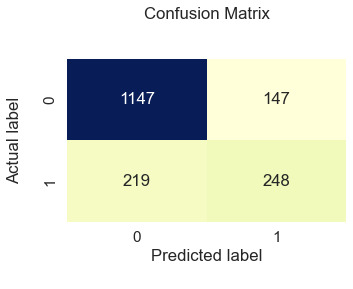



              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1294
           1       0.63      0.53      0.58       467

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.79      1761
 

   model_name  accuracy  precision  recall      f1
0  Linear SVC    0.7922     0.6278   0.531  0.5754


In [61]:
model_metrics(model_performance_after_hypertuning, 'Linear SVC', y_test, pred_2, True, True)

print(model_performance_after_hypertuning.tail(1))


# Gaussian-rbf SVC

In [62]:
Gaussian_rbf_SVC = SVC(kernel = 'rbf', random_state = 42)

param_dist = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'gamma' : [ 0.0001 , 0.001, 0.01, 0.1, 1.0, 10]
}

Gaussian_rbf_SVC_hp =  RandomizedSearchCV(Gaussian_rbf_SVC, param_distributions = param_dist  , cv = 5, random_state= 42)
result3 = Gaussian_rbf_SVC_hp.fit(x_train, y_train)

In [63]:
print(result3.best_estimator_)

pred_3 = result3.predict(x_test)

SVC(C=10.0, gamma=0.01, random_state=42)


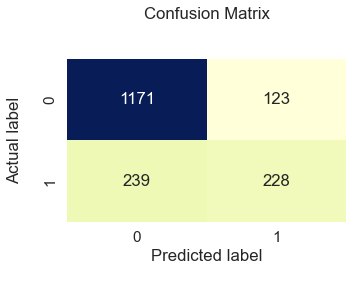



              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1294
           1       0.65      0.49      0.56       467

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761
 

         model_name  accuracy  precision  recall      f1
1  Gaussian-rbf SVC    0.7944     0.6496  0.4882  0.5575


In [64]:
model_metrics(model_performance_after_hypertuning, 'Gaussian-rbf SVC', y_test, pred_3, True, True)

print(model_performance_after_hypertuning.tail(1))

# Model Evaluation

In [65]:
model_performance_without_hypertuning

,model_name,accuracy,precision,recall,f1
0,Linear SVC,0.7922,0.6278,0.5310,0.5754
1,Gaussian-rbf SVC,0.7939,0.6421,0.5032,0.5642
2,polynomial SVC,0.7774,0.6100,0.4454,0.5149
3,Sigmoid SVC,0.7087,0.4533,0.4775,0.4651


In [66]:
model_performance_after_hypertuning

,model_name,accuracy,precision,recall,f1
0,Linear SVC,0.7922,0.6278,0.5310,0.5754
1,Gaussian-rbf SVC,0.7944,0.6496,0.4882,0.5575


-------------------------------------------------------------------------------------------------------------------------------

# MODEL BUILDING USING NUERAL NETWORKS

In [1]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import collections
import warnings
warnings.filterwarnings("ignore")


In [49]:
pip install numpy --upgrade


Note: you may need to restart the kernel to use updated packages.


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
summary = df.describe(include=["O"])
summary

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [8]:
df.dropna(how="any",inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data_cont = ['tenure','MonthlyCharges', 'TotalCharges']
data_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']

In [11]:
scaler = StandardScaler()
data_continuous = scaler.fit_transform(df[data_cont])

In [12]:
for cols in data_cat:
    df.loc[:,cols] = LabelEncoder().fit_transform(df.loc[:,cols])

onehotencoder = OneHotEncoder(sparse=False)
data_categorical = onehotencoder.fit_transform(df[data_cat])

In [13]:
features = np.concatenate([data_continuous, data_categorical], axis=1)

target = df.iloc[:,20:].values
target = LabelEncoder().fit_transform(target)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)


In [15]:
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu",input_shape=(46,)))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu"))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu"))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [71]:
classifier.fit(X_train, y_train, batch_size = 50, epochs = 150)

Epoch 1/150
113/113 [==============================] - 1s 5ms/step - loss: 0.4008 - accuracy: 0.8050
Epoch 2/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3945 - accuracy: 0.8114
Epoch 3/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3987 - accuracy: 0.8078
Epoch 4/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3966 - accuracy: 0.8085
Epoch 5/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3999 - accuracy: 0.8062
Epoch 6/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3977 - accuracy: 0.8052
Epoch 7/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3950 - accuracy: 0.8060
Epoch 8/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3973 - accuracy: 0.8057
Epoch 9/150
113/113 [==============================] - 1s 5ms/step - loss: 0.4008 - accuracy: 0.8062
Epoch 10/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3964 - accura

113/113 [==============================] - 1s 5ms/step - loss: 0.3958 - accuracy: 0.8121
Epoch 82/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3979 - accuracy: 0.8089
Epoch 83/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3959 - accuracy: 0.8059
Epoch 84/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3993 - accuracy: 0.8064
Epoch 85/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3990 - accuracy: 0.8084
Epoch 86/150
113/113 [==============================] - 1s 5ms/step - loss: 0.4004 - accuracy: 0.8020
Epoch 87/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3999 - accuracy: 0.8011
Epoch 88/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3929 - accuracy: 0.8107
Epoch 89/150
113/113 [==============================] - 1s 5ms/step - loss: 0.4011 - accuracy: 0.8053
Epoch 90/150
113/113 [==============================] - 1s 5ms/step - loss: 0.3996 - accuracy: 

In [72]:
classifier.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8010


[0.44002968072891235, 0.8009950518608093]

In [73]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

44/44 [==============================] - 0s 3ms/step


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.65      0.52      0.58       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Text(91.68, 0.5, 'predicted label')

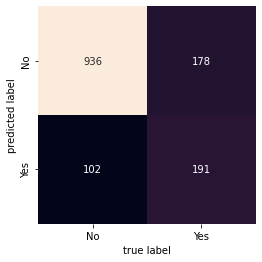

In [75]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T,square=True, annot=True, fmt='d', cbar=False,xticklabels=['No','Yes'],yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [76]:

#Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

#Precision Score = TP / (FP + TP)
print('Precision: %.3f' % precision_score(y_test, y_pred))

#Recall Score = TP / (FN + TP)
print('Recall: %.3f' % recall_score(y_test, y_pred))

#F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)

print('F1-Score: %.3f' % f1_score(y_test, y_pred))



Accuracy: 0.801
Precision: 0.652
Recall: 0.518
F1-Score: 0.577


# Conclusion

the classifier with highest accuracy is Deep learning model build using ANN and its accuracy is noted to be 80.10%